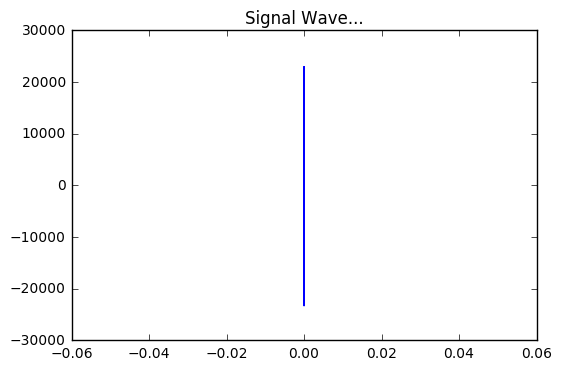

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import wave
import sys, os


spf = wave.open('test.wav','r')

#Extract Raw Audio from Wav File
signal = spf.readframes(-1)
signal = np.fromstring(signal, 'Int16')
signal = signal[::2]
fs = spf.getframerate()

Time=np.linspace(0, len(signal)/fs, num=len(signal))

plt.figure(1)
plt.title('Signal Wave...')
plt.plot(Time,signal)
plt.show()
spf.close()
os.remove("test.wav")


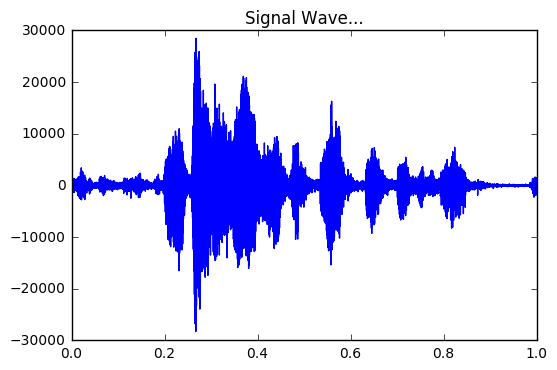

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import wave
import sys


spf = wave.open('C:\Users\Haseeb Majid\Documents\cs407\Project\EmotionCommotion\local\IEMOCAP_full_release\Session1\sentences\wav\Ses01F_impro01\Ses01F_impro01_F010.wav','r')

#Extract Raw Audio from Wav File
signal = spf.readframes(-1)
signal = np.fromstring(signal, 'Int16')
signal = signal[::2]
fs = spf.getframerate()


Time=np.linspace(0, len(signal)/fs, num=len(signal))

plt.figure(1)
plt.title('Signal Wave...')
plt.plot(Time,signal)
plt.show()

In [8]:
"""
Definition of views.
"""

from sklearn.externals import joblib
import scipy.io.wavfile 
import numpy as np
import os, json, sys
sys.path.append("C:\Users\Haseeb Majid\Documents\cs407\Project\EmotionCommotion\EmotionCommotion\app")

from datagrabber import *
from allExtractors import *

tmp_file = "C:\Users\Haseeb Majid\Documents\cs407\Project\EmotionCommotion\local\IEMOCAP_full_release\Session1\sentences\wav\Ses01F_impro01\Ses01F_impro01_F010.wav"
mydata = scipy.io.wavfile.read(tmp_file)
mydata = mydata[1][:,0]

audiofile = get_audiofile(tmp_file,data=mydata,flag=False)
features = [amplitude,cepstrum,energy,silence_ratio,zerocrossing,f0,mfcc]
frames = get_frames(audiofile)

agg_vals = []
for feature in features:
    vals = []
    for frame in frames:
        vals.append(feature(frame, audiofile))
    vals = np.array(vals)
    agg_vals = np.concatenate((agg_vals,aggregate(vals)), axis=0)


svm = joblib.load('/backend/classifiers/svm.pkl') 
result = svm.predict(agg_vals)
print(result)


ImportError: No module named aubio